In [21]:
import pandas as pd
import tensorflow as tf
import classification_utils
import numpy as np

In [22]:
df = pd.read_csv("./dataset/users_df_dataset_cleaned_with_indicators.csv")

In [23]:
df = df[[
#    "user_id"  ,
#    "name"  ,
#    "lang"  ,
    "bot"  ,
#    "created_at" ,
    "statuses_count" ,
    "account_age_in_days" ,
    "number_of_tweets" ,
    "account_average_tweets_per_day" ,
    "avg_tweets_per_actual_day" ,
#    "day_with_most_tweets" ,
    "max_number_of_tweets_in_a_day",
    "entropy_for_day",
    "entropy_for_hour",
    "entropy_for_minute",
    "avg_hashtags",
    "avg_text_length",
    "avg_mentions",
    "avg_special_char_in_text",
    "total_likes",
    "avt_favorite_count",
    "total_replies",
    "avt_reply_count",
    "total_retweet_count",
    "account_discussion_creation_ratio",
    "tweet_num_likes_ratio",
    "tweet_num_replies_ratio",
    "entropy_original_text",
    "entropy_text",
    "mean_inactive_period_length_in_seconds",
    "median_inactive_period_length_in_seconds",
    "mode_inactive_period_length_in_seconds",
    "mode_count"
]]

In [25]:
target_array = tf.convert_to_tensor(df.pop("bot"))
feature_matrix = tf.convert_to_tensor(df)

In [26]:
"""
from sklearn.model_selection import train_test_split

train_ratio = 0.7
validation_ratio = 0.2
test_ratio = 0.1

x_train_val, x_test, y_train_val, y_test = train_test_split(feature_matrix, target_array, test_size= test_ratio)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val,  test_size=validation_ratio/(train_ratio + validation_ratio) )

"""


'\nfrom sklearn.model_selection import train_test_split\n\ntrain_ratio = 0.7\nvalidation_ratio = 0.2\ntest_ratio = 0.1\n\nx_train_val, x_test, y_train_val, y_test = train_test_split(feature_matrix, target_array, test_size= test_ratio)\nx_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val,  test_size=validation_ratio/(train_ratio + validation_ratio) )\n\n'

Epoch 1/200
5/5 [==============================] - 1s 60ms/step - loss: 0.8618 - accuracy: 0.3672 - val_loss: 0.8096 - val_accuracy: 0.4370
Epoch 2/200
5/5 [==============================] - 0s 21ms/step - loss: 0.7654 - accuracy: 0.4824 - val_loss: 0.7204 - val_accuracy: 0.6206
Epoch 3/200
5/5 [==============================] - 0s 18ms/step - loss: 0.6854 - accuracy: 0.6645 - val_loss: 0.6484 - val_accuracy: 0.7507
Epoch 4/200
5/5 [==============================] - 0s 17ms/step - loss: 0.6225 - accuracy: 0.7574 - val_loss: 0.5919 - val_accuracy: 0.7957
Epoch 5/200
5/5 [==============================] - 0s 20ms/step - loss: 0.5747 - accuracy: 0.7910 - val_loss: 0.5484 - val_accuracy: 0.8110
Epoch 6/200
5/5 [==============================] - 0s 22ms/step - loss: 0.5389 - accuracy: 0.8048 - val_loss: 0.5150 - val_accuracy: 0.8186
Epoch 7/200
5/5 [==============================] - 0s 26ms/step - loss: 0.5111 - accuracy: 0.8111 - val_loss: 0.4895 - val_accuracy: 0.8231
Epoch 8/200
5/5 [===

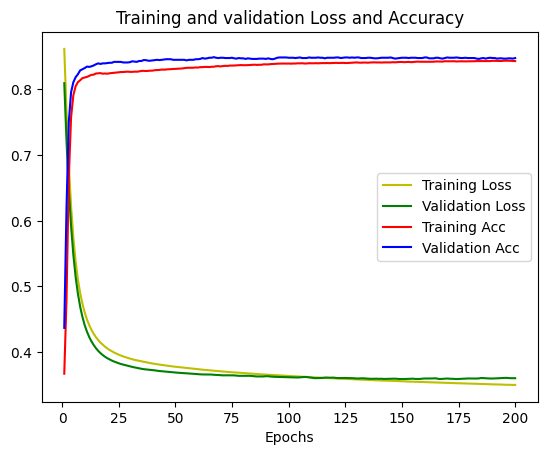

In [29]:
in_layer = tf.keras.layers.Normalization(axis=-1)
in_layer.adapt(feature_matrix)

model = tf.keras.models.Sequential([
  in_layer,
  tf.keras.layers.Dense(64, activation='relu'),   
  tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"]
)

history = model.fit(
  feature_matrix,
  target_array,
  batch_size=2048,
  epochs=200,
  validation_split=0.2,
  shuffle=True
)

classification_utils.print_training_stats(history=history)

In [31]:
train_pred = (model.predict(feature_matrix) > 0.5).astype("bool")
correct_train = 0
for (pred, expected) in zip(train_pred, target_array):
    if pred == expected:
        correct_train +=1
print("Training set:", correct_train , "correct over", len(train_pred), "\nAccuracy in train:", correct_train/len(train_pred))

'''
val_pred = (model.predict(x_val) > 0.5).astype("bool")
correct_val = 0
for (pred, expected) in zip(val_pred, y_val):
    if pred == expected:
        correct_val +=1

print("Validation set:", correct_val , "correct over", len(x_val), "\nAccuracy in validation:", correct_val/len(x_val))
'''

348/348 [==============================] - 1s 2ms/step
Training set: 9382 correct over 11109 
Accuracy in train: 0.8445404626879107


'\nval_pred = (model.predict(x_val) > 0.5).astype("bool")\ncorrect_val = 0\nfor (pred, expected) in zip(val_pred, y_val):\n    if pred == expected:\n        correct_val +=1\n\nprint("Validation set:", correct_val , "correct over", len(x_val), "\nAccuracy in validation:", correct_val/len(x_val))\n'

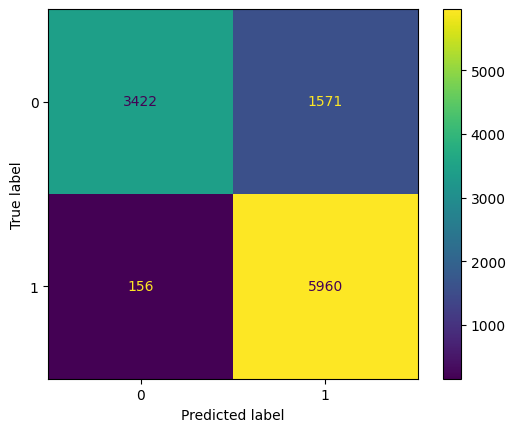

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_array, train_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()